In [12]:
#importing the libraries

import pandas as pd
import os
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten#here we use 4 different layers
from keras.activations import relu,softmax
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [13]:
#setting the path of the data
train='/kaggle/input/birds-200/birds_train'
test='/kaggle/input/birds-200/birds_test'

# Using  Data augmentation

In [14]:
train_datagen=ImageDataGenerator(rescale=1/255,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,
                           vertical_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1/255)

In [15]:
train_gen=train_datagen.flow_from_directory(train,target_size=(100,100))

Found 8000 images belonging to 200 classes.


# Now building the model

here we are using 3 convoloutional neural network with 2 dense layer

In [18]:
model=Sequential()

model.add(Conv2D(filters=132,kernel_size=(3,3),input_shape=(100,100,3),activation='relu'))
model.add(MaxPool2D())


model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())


model.add(Conv2D(120,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(70,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())


model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='softmax'))

In [19]:
#compiling the model
model.compile(optimizer='adam',loss=categorical_crossentropy,metrics=['accuracy'])

In [20]:
#adding the callback
EArly=EarlyStopping(patience=3)
lr=ReduceLROnPlateau()
rsult=model.fit(train_gen,batch_size=32,epochs=25,callbacks=[EArly,lr])

Epoch 1/25
250/250 [==============================] - 117s 451ms/step - loss: 5.2923 - accuracy: 0.0036
Epoch 2/25
250/250 [==============================] - 61s 244ms/step - loss: 5.1217 - accuracy: 0.0097
Epoch 3/25
250/250 [==============================] - 57s 227ms/step - loss: 4.9997 - accuracy: 0.0105
Epoch 4/25
250/250 [==============================] - 56s 224ms/step - loss: 4.8895 - accuracy: 0.0141
Epoch 5/25
250/250 [==============================] - 58s 230ms/step - loss: 4.7790 - accuracy: 0.0206
Epoch 6/25
250/250 [==============================] - 57s 226ms/step - loss: 4.6888 - accuracy: 0.0250
Epoch 7/25
250/250 [==============================] - 57s 227ms/step - loss: 4.5925 - accuracy: 0.0354
Epoch 8/25
250/250 [==============================] - 57s 228ms/step - loss: 4.5124 - accuracy: 0.0410
Epoch 9/25
250/250 [==============================] - 57s 228ms/step - loss: 4.4045 - accuracy: 0.0488
Epoch 10/25
250/250 [==============================] - 57s 229ms/step - 

In [21]:
from keras.preprocessing.image import load_img
from keras.preprocessing import image

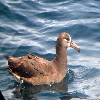

In [22]:
img=load_img('../input/birds-200/birds_train/001.Black_footed_Albatross/0.jpg',target_size=(100,100))
img

In [26]:
img1=image.img_to_array(img)
img1
img1.shape
test_img = np.expand_dims(img1,axis = 0)

In [27]:
predicted=model.predict(test_img)

In [28]:
np.argmax(predicted)

94

In [29]:
predicted

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.8831114e-27,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [30]:
train_gen.class_indices

{'001.Black_footed_Albatross': 0,
 '002.Laysan_Albatross': 1,
 '003.Sooty_Albatross': 2,
 '004.Groove_billed_Ani': 3,
 '005.Crested_Auklet': 4,
 '006.Least_Auklet': 5,
 '007.Parakeet_Auklet': 6,
 '008.Rhinoceros_Auklet': 7,
 '009.Brewer_Blackbird': 8,
 '010.Red_winged_Blackbird': 9,
 '011.Rusty_Blackbird': 10,
 '012.Yellow_headed_Blackbird': 11,
 '013.Bobolink': 12,
 '014.Indigo_Bunting': 13,
 '015.Lazuli_Bunting': 14,
 '016.Painted_Bunting': 15,
 '017.Cardinal': 16,
 '018.Spotted_Catbird': 17,
 '019.Gray_Catbird': 18,
 '020.Yellow_breasted_Chat': 19,
 '021.Eastern_Towhee': 20,
 '022.Chuck_will_Widow': 21,
 '023.Brandt_Cormorant': 22,
 '024.Red_faced_Cormorant': 23,
 '025.Pelagic_Cormorant': 24,
 '026.Bronzed_Cowbird': 25,
 '027.Shiny_Cowbird': 26,
 '028.Brown_Creeper': 27,
 '029.American_Crow': 28,
 '030.Fish_Crow': 29,
 '031.Black_billed_Cuckoo': 30,
 '032.Mangrove_Cuckoo': 31,
 '033.Yellow_billed_Cuckoo': 32,
 '034.Gray_crowned_Rosy_Finch': 33,
 '035.Purple_Finch': 34,
 '036.Norther